'''

=================================================


Milestone 1

Nama  : Rais Yufli Xavierullah

Batch : HCK-007


=================================================

'''

Link Dataset:
https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis

Link Tableu:
https://public.tableau.com/shared/7GPBRTBH6?:display_count=n&:origin=viz_share_link



# Problem Statement

Perusahaan DataCo memiliki masalah karena adanya komplain dari pelanggan tentang adanya keterlambatan. Sebagai seorang data analyst saya mencoba membantu permasalah perusahaan DataCo dengan mencoba memperlihatkan data-data yang berhubungan dengan keterlambatan dari pengiriman barang agar perusahaan dapat mengembangkan strategi yang dapat meningkatkan kepuasaan pelanggan

## Penjabaran masalah dengan metode 5W+1H:

- Berapa central tendency untuk waktu keterlambatan 
- Apa saja faktor yang menyebabkan keterlambatan
- Negara mana yang mempunyai benefit tertinggi dan kerugian terendah
- Negara mana yang paling banyak mengalami keterlambatan datang produk sesuai dengan marketnya
- tipe model kapal apa yang paling banyak mengalami resiko keterlambatan dengan marketnya
- Berapa rata-rata jumlah resiko keterlambatan dari kategori produk sesuai dengan nama departementnya
- Berapa rata-rata jumlah resiko keterlambatan dari segment pelanggan
- Apakah waktu keterlambatan mempunyai perbedaan signifikan dengan resiko keterlambatan

In [2]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading

In [5]:
#Memanggil data set yang dipunya
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='Latin')

df


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


# Data Cleaning


In [6]:
#Mengetahui info data yang dimiliki
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

Dari info tersebut dapat dilihat bahwa terdapat 53 kolom dengan tipe data float 15, interger 14, dan object 24. Untuk missing value didapatkan dari kolom 'Order description' dan juga 'Order Zipcode'

In [7]:
df1=df.drop(['Customer Email','Customer Fname','Customer Lname','Customer Password','Customer Street','Customer Zipcode','Latitude','Longitude','Order City','Order Zipcode','Product Description',
           'Product Image', 'Product Status','Sales per customer','Category Id','Customer City','Customer Country','Customer State','Department Id','Order Customer Id','order date (DateOrders)',
           'Order Id','Order Item Cardprod Id','Order Item Discount','Order Item Discount Rate','Order Item Id','Order Item Product Price','Order Item Profit Ratio','Sales','Order Profit Per Order',
           'Order Region','Order State','Product Card Id','Product Category Id','Product Name','Product Price','shipping date (DateOrders)','Customer Id','Order Item Quantity','Order Status'],axis=1)

df1

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Late_delivery_risk,Category Name,Customer Segment,Department Name,Market,Order Country,Order Item Total,Shipping Mode
0,DEBIT,3,4,91.250000,Advance shipping,0,Sporting Goods,Consumer,Fitness,Pacific Asia,Indonesia,314.640015,Standard Class
1,TRANSFER,5,4,-249.089996,Late delivery,1,Sporting Goods,Consumer,Fitness,Pacific Asia,India,311.359985,Standard Class
2,CASH,4,4,-247.779999,Shipping on time,0,Sporting Goods,Consumer,Fitness,Pacific Asia,India,309.720001,Standard Class
3,DEBIT,3,4,22.860001,Advance shipping,0,Sporting Goods,Home Office,Fitness,Pacific Asia,Australia,304.809998,Standard Class
4,PAYMENT,2,4,134.210007,Advance shipping,0,Sporting Goods,Corporate,Fitness,Pacific Asia,Australia,298.250000,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,Shipping on time,0,Fishing,Home Office,Fan Shop,Pacific Asia,China,399.980011,Standard Class
180515,DEBIT,3,2,-613.770019,Late delivery,1,Fishing,Corporate,Fan Shop,Pacific Asia,Japón,395.980011,Second Class
180516,TRANSFER,5,4,141.110001,Late delivery,1,Fishing,Corporate,Fan Shop,Pacific Asia,Australia,391.980011,Standard Class
180517,PAYMENT,3,4,186.229996,Advance shipping,0,Fishing,Consumer,Fan Shop,Pacific Asia,Australia,387.980011,Standard Class


Saya mencoba menghilangkan beberapa kolom yang tidak digunakan untuk menjawab pertanyaan dari permasalahannya 

# Analisis dan perhitungan

## Berapa central tendency untuk waktu keterlambatan 

In [ ]:
#Mendrop shipping canceled dan merubah advance shipping di kolom delivery status
df1 = df1[df1['Delivery Status'] != 'Shipping canceled']
df1['Delivery Status'] = df1['Delivery Status'].str.contains('Advance shipping|Shipping on time', case=False)
df1['Delivery Status'] = df1['Delivery Status'].replace({True: 'Shipping on time', False: 'Late delivery'})



Saya mengasumsikan untuk mencari keterlambatan saya menghapuskan perjalanan yang dibatalkan dan juga merubah waktu datangnya melebihi ekspektasi menjadi waktu tepat waktu. Menjadikan saya hanya mempunyai 2 kategori saja di kolom 'Delivery Status' yaitu waktu yang tepat waktu dan waktu yang telat 

In [8]:
#Mendapatkan waktu keterlambatan
late_time =  df1['Days for shipping (real)'] - df1['Days for shipment (scheduled)']
late_time = late_time.clip(lower=0)

df1['Late time'] = late_time



Untuk dapat menghitung pertanyaan dari hal tersebut saya mencoba membuat kolom baru yang mana kolom tersebut berisikan selisih dari waktu yang terjadwalkan dan waktu datangnya 

In [14]:
rata = df1['Late time'].mean()
print(f"rata-rata {'Late time'}: {rata}\n")

median = df1['Late time'].median()
print(f"median {'Late time'}: {median}\n")

mode = df1['Late time'].mode()
print(f"modus {'Late time'}: {mode}\n")


rata-rata Late time: 0.9270569849217145

median Late time: 1.0

modus Late time: 0    0
Name: Late time, dtype: int64



Didapatkan hasil bahwa rata-rata dari waktu keterlambatan sebesar 0.9270569849217145, untuk nilai mediannya sebesar 1, dan modusnya bernilai 0

## Apa saja faktor yang menyebabkan keterlambatan

Untuk menjawab dari pertanyaan ini saya menggunakan chi-squared test yang mana saya membandingkan antara dua kategorikal data. Hipotesan yang saya berikan pada tes ini yaitu:

Ho : Variabel dan Status delivery tidak bergantungan

H1 : Variabel dan Status delivery bergantungan

Saya menggunakan kepercayaan 95%

In [20]:
#Melihat keterkaitan dengan setiap faktor
cols = df1.drop(columns=['Delivery Status','Days for shipping (real)','Days for shipment (scheduled)','Benefit per order','Late_delivery_risk','Late time','Order Item Total']).columns

results = []

for col in cols:
    cross = pd.crosstab(df1[col], df1['Delivery Status'])
    pval = stats.chi2_contingency(cross)[1]
    dependency = "Dependent" if pval < 0.05 else "Independent"
    results.append({'Column': col, 'P-Value': pval, 'Dependency': dependency})

results_df = pd.DataFrame(results)

print(results_df)


             Column        P-Value   Dependency
0              Type   0.000000e+00    Dependent
1     Category Name   6.712499e-01  Independent
2  Customer Segment   3.760953e-02    Dependent
3   Department Name   5.369346e-01  Independent
4            Market   7.558588e-04    Dependent
5     Order Country  7.823411e-124    Dependent
6     Shipping Mode   0.000000e+00    Dependent


Dari data yang dilihat bahwa kategori yang mempunyai ketergantungan dengan 'Delivery Status' yaitu 'Order Country' dan juga 'Shipping Mode' yang mana mempunyai nilai dibawah 0,05 maka H0 ditolak

## Negara mana yang mempunyai benefit tertinggi dan kerugian terendah

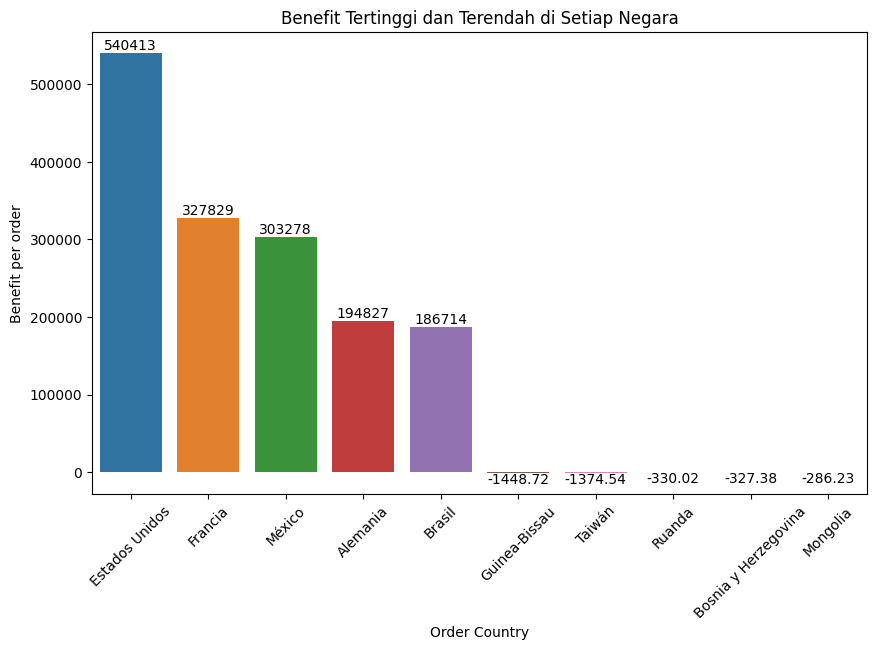

In [10]:
# Hitung total benefit per negara 
benefit = df1.groupby('Order Country')['Benefit per order'].sum().reset_index()

# Menampilkan 5 angka tertinggi dan 5 angka terendah
top_5_max_benefit = benefit.nlargest(5, 'Benefit per order')
top_5_min_benefit = benefit.nsmallest(5, 'Benefit per order')

# Menggabungkan data tertinggi dan terendah
top_and_bottom_benefit = pd.concat([top_5_max_benefit, top_5_min_benefit])

# Membuat bar chart 
plt.figure(figsize=(10, 6))
barplots = sns.barplot(data=top_and_bottom_benefit, x='Order Country', y='Benefit per order')

for i in barplots.containers:
    barplots.bar_label(i)

plt.title("Benefit Tertinggi dan Terendah di Setiap Negara")
plt.xticks(rotation=45)
plt.show()

Dapat dilihat dari chart bahwa negara paling tertinggi untuk benefit yaitu Estados Unidos sebesar 
516687 dan untuk yang paling kecil negara Guinea-Bissau sebesar -1448.72, selain itu juga terdapat negara yang paling tinggi selain Estados Unidos yaitu, Francia, Mexico. Dan yang paling terkecil selain  Guinea-Bissau yaitu Taiwan dan Ruanda

## Negara mana yang memiliki jumlah keterlambatan waktu terbanyak datang produk sesuai dengan benuanya

In [16]:
late = df1.groupby(['Order Country'])['Late time'].mean()
late

Order Country
Afganistán      0.932515
Albania         0.648649
Alemania        0.946884
Angola          1.075163
Arabia Saudí    0.894186
                  ...   
Vietnam         0.895641
Yemen           1.239437
Yibuti          1.129032
Zambia          0.932331
Zimbabue        0.863158
Name: Late time, Length: 164, dtype: float64

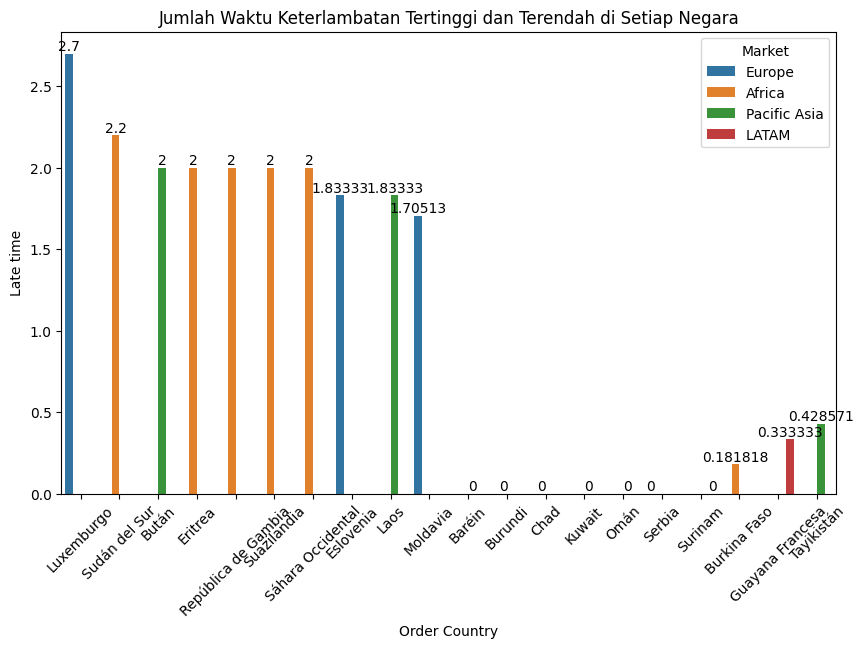

In [11]:
# Hitung total risiko keterlambatan pengiriman per negara dan per pasar
late = df1.groupby(['Order Country', 'Market'])['Late time'].mean().reset_index()

# Menampilkan 5 angka tertinggi dan 5 angka terendah
top_10_max_late = late.nlargest(10, 'Late time')
top_10_min_late = late.nsmallest(10, 'Late time')

# Menggabungkan data tertinggi dan terendah
top_and_bottom_late = pd.concat([top_10_max_late, top_10_min_late])

# Membuat bar chart dengan hue berdasarkan 'Market'
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=top_and_bottom_late, x='Order Country', y='Late time', hue='Market')

for i in barplot.containers:
    barplot.bar_label(i)

plt.title("Jumlah Waktu Keterlambatan Tertinggi dan Terendah di Setiap Negara")
plt.xticks(rotation=45)
plt.legend(title='Market')
plt.show()

Dapat dilihat dari chart bahwa jumlah waktu keterlambatan tertinggi yaitu Estados Unidos sebesar 22136 berada di USCA dan untuk yang paling kecil negara Oman sebesar 0, selain itu juga terdapat negara yang paling tinggi selain Estados Unidos yaitu, Francia, Mexico. Dan yang paling terkecil selain Oman yaitu Burundi, Chad, Kuwait, Barein, Serbia, Surinam.

## Tipe kapal apa yang paling banyak mengalami resiko keterlambatan sesuai dengan marketnya

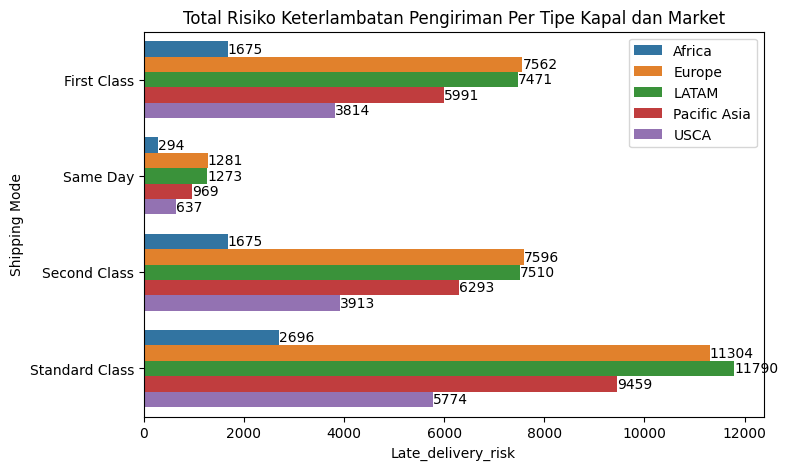

In [29]:
# Hitung total risiko keterlambatan pengiriman per tipe kapal dan market
Status = df1.groupby(['Market', 'Shipping Mode'])['Late_delivery_risk'].sum().reset_index()

# Membuat bar chart dengan hue berdasarkan 'Market'
fig,ax1 = plt.subplots(figsize=(8,5))
splot= sns.barplot(data=Status, x='Late_delivery_risk', y='Shipping Mode',
            orient='h', hue='Market', ax=ax1)
# Membuat label
for i in splot.containers:
    splot.bar_label(i)
plt.legend(bbox_to_anchor=(1,1))
plt.title("Total Risiko Keterlambatan Pengiriman Per Tipe Kapal dan Market")
plt.show()

Dapat dilihat dari chart bahwa tipe kapal yang mempunyai keterlambatan yang paling banyak yaitu Standar Class yang mempunyai market LATAM sebesar 11790 dan untuk yang paling kecil tipe kapal Same yang mempuntai market Afrika sebesar 294 dan dapat dilihat juga bahwa banyaknya barang yang telat yang mempunyai market Europe dan Latam paling sedikti market Afrika

## Berapa rata-rata jumlah resiko keterlambatan dari kategori produk sesuai dengan nama departementnya

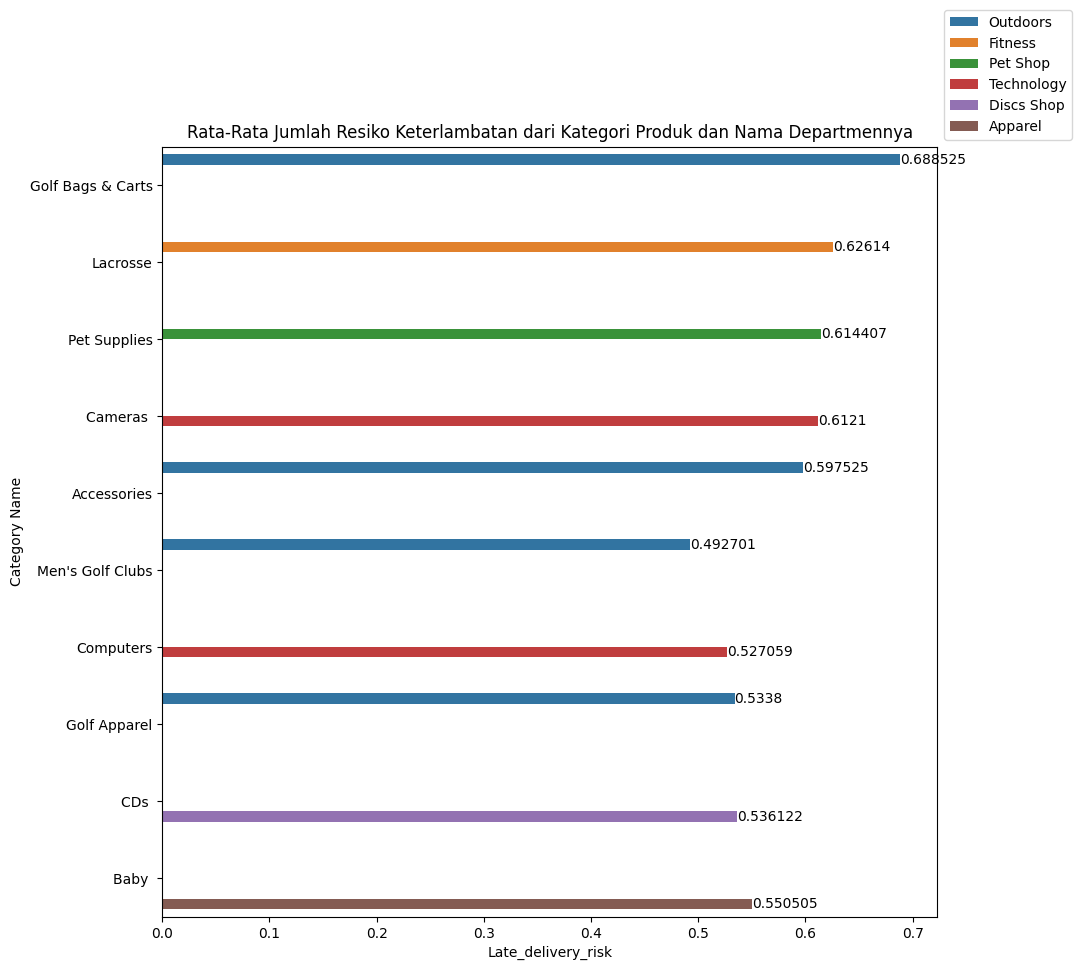

In [6]:
# Hitung rata-rata jumlah keterlambatan dari kategori produk dan nama departmennya
Status = df1.groupby(['Category Name', 'Department Name'])['Late_delivery_risk'].mean().reset_index()

# Menampilkan 5 angka tertinggi dan 5 angka terendah
top_5_max_category = Status.nlargest(5, 'Late_delivery_risk')
top_5_min_category = Status.nsmallest(5, 'Late_delivery_risk')

# Menggabungkan data tertinggi dan terendah
top_and_bottom_category = pd.concat([top_5_max_category, top_5_min_category])

# Membuat bar chart dengan hue berdasarkan 'Department Name'
fig,ax1 = plt.subplots(figsize=(10,10))
splot= sns.barplot(data=top_and_bottom_category, x='Late_delivery_risk', y='Category Name',
            orient='h', hue='Department Name', ax=ax1)
# Membuat label
for i in splot.containers:
    splot.bar_label(i)
plt.legend(bbox_to_anchor=(1,1))
plt.title("Rata-Rata Jumlah Resiko Keterlambatan dari Kategori Produk dan Nama Departmennya")
plt.show()

Dapat dilihat dari chart bahwa rata-rata jumlah keterlambatan dari setiap kategori adalah yang paling tinggi golf bag and carts yang termasuk dalam outdoors dengan nilai 0.68825 sedangkan yang paling rendah kategori men's golf clubs dengan rata-rata nilai 0.492701 termasuk dalam kategori outdoors

## Berapa rata-rata jumlah resiko keterlambatan dari segment pelanggan

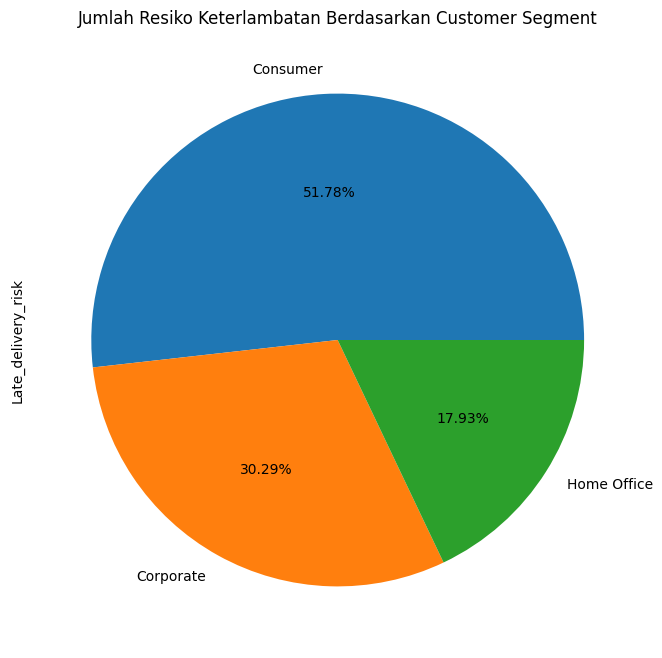

In [8]:
# Menghitung jumlah keterlambatan berdasarkan Customer Segment
delayed_counts = df1.groupby('Customer Segment')['Late_delivery_risk'].sum()

# Membuat pie chart untuk Customer Segment yang mengalami keterlambatan
fig, ax1 = plt.subplots(figsize=(8, 8))
delayed_counts.plot(kind='pie', autopct='%.2f%%', ax=ax1)
plt.title('Jumlah Resiko Keterlambatan Berdasarkan Customer Segment')
plt.show()

Untuk segmentasi pelanggan dapat dilihat resiko tertinggi didapatkan segment consumer sebesar 51.78 sedangkan terendah didapatkan segment home office sebesar 17.93

## Apakah waktu keterlambatan mempunyai perbedaan signifikan dengan resiko keterlambatan

Untuk menjawab dari pertanyaan ini saya menggunakan Two test sample yang mana saya membandingkan antara dua numerikal data.Karena ingin menguji perbedaan signifikan antara waktu keterlambatan dan resiko keterlambatan. Hipotesan yang saya berikan pada tes ini yaitu:

Ho : Waktu Keterlambatan sama dengan Resiko Keterlambatan

H1 : Waktu Keterlambatan tidak sama dengan Resiko Keterlambatan

Saya menggunakan kepercayaan 95%

In [33]:
# Tes Uji Two Test Sampe
t_stat, p_val = stats.ttest_ind(df1['Late_delivery_risk'],df1['Late time'])
print('P-value:',p_val)

P-value: 0.0


p-value (0): Dikarenakan p-value <= 0,05 maka dapat disimpulkan bahwa terdapat perbedaan yang signifikan antara waktu keterlambatan dan resiko keterlambatan


**Hipotesa 0 Ditolak**

# Kesimpulan

Kesimpulan yang dapat ditarik bahwa faktor yang mempunyai hubungan antara status pengiriman yaitu karena negara dan juga tipe model kapal. Dapat dilihat juga bahwa perusahaan dapat berfokus kepada tiga negara yaitu Estados Unidos,Francia, Mexico dikarenakan masing-masing negara mempunyai benefit yang paling besar terhadap perusahaan tetapi paling lama juga untuk masalah keterlambatannya. Selain itu juga dapat dilihat dari pengirimannya bahwa tipe model standart class sangat banyak sekali mengalami resiko keterlambatan tinggi khususnya untuk Latam dan Europe. Dan juga untuk kategori produknya golf bag and carts yang termasuk dalam outdoors mempunyai nilai rata-rata tertinggi yaitu 0.68825. Untuk segment berfokus pada consumer pada masalah keterlambatan

In [246]:
#Merubah tabel yang ada menjadi file csv
df1.to_csv('Data_Late.csv', index=False)